In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
sns.set_context('paper')

In [3]:
path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/impurity_index.csv'
gini_idx = pd.read_csv(path)
gini_idx = gini_idx[['tconst', 'Impurity Index']]
print(gini_idx.shape)
gini_idx.head()

(3540, 2)


,tconst,Impurity Index
0,tt0035423,0.000
1,tt0118589,0.750
2,tt0120467,0.375
3,tt0120667,0.375
4,tt0120679,0.625


In [4]:
movies_cast_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/movies_cast_2.csv'
movies_cast = pd.read_csv(movies_cast_path)
print(movies_cast.shape)
movies_cast.head(2)

(3540, 20)


,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291..."
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225..."


In [5]:
genre_dict = dict(zip(movies_cast.tconst, movies_cast.genres))
year_dict = dict(zip(movies_cast.tconst, movies_cast.startYear))

In [6]:
gini_idx['genres'] = gini_idx.apply(lambda x: genre_dict[x.tconst], axis=1)
gini_idx['startYear'] = gini_idx.apply(lambda x: year_dict[x.tconst], axis=1)
gini_idx.head()

,tconst,Impurity Index,genres,startYear
0,tt0035423,0.000,"Comedy,Fantasy,Romance",2001
1,tt0118589,0.750,"Drama,Music,Romance",2001
2,tt0120467,0.375,"Crime,Drama,Thriller",2000
3,tt0120667,0.375,"Action,Adventure,Fantasy",2005
4,tt0120679,0.625,"Biography,Drama,Romance",2002


In [7]:
gini_exp = gini_idx.assign(genres_sep=gini_idx['genres'].str.split(',')).explode('genres_sep')
print(gini_exp.shape)
gini_exp.head()

(9124, 5)


,tconst,Impurity Index,genres,startYear,genres_sep
0,tt0035423,0.00,"Comedy,Fantasy,Romance",2001,Comedy
0,tt0035423,0.00,"Comedy,Fantasy,Romance",2001,Fantasy
0,tt0035423,0.00,"Comedy,Fantasy,Romance",2001,Romance
1,tt0118589,0.75,"Drama,Music,Romance",2001,Drama
1,tt0118589,0.75,"Drama,Music,Romance",2001,Music


In [8]:
gini_genre_year = pd.DataFrame(gini_exp.groupby(['genres_sep', 'startYear'])['Impurity Index'].mean())
gini_genre_year.head()

Impurity Index
genres_sep startYear                
Action     2000             0.314655
           2001             0.378049
           2002             0.414773
           2003             0.388889
           2004             0.356266

In [9]:
gini_genre_year_dict = pd.pivot_table(gini_genre_year.reset_index(),
                                      values='Impurity Index',
                                      index='genres_sep',
                                      columns='startYear').to_dict(orient='index')

In [10]:
starpower_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/starpowers.csv'
starpower = pd.read_csv(starpower_path)
print(starpower.shape)
starpower.head()

(3540, 4)


,tconst,nconst,starpowers,avg_starpowers
0,tt0035423,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","[6.3428571428571425, 6.666666666666667, 6.4000...",6.402381
1,tt0118589,"['nm0001014', 'nm0073160', 'nm0066586', 'nm000...","[nan, nan, 6.0, nan]",6.000000
2,tt0120467,"['nm0641168', 'nm0424682', 'nm0507915', 'nm083...","[7.7, nan, nan, 5.25]",6.475000
3,tt0120667,"['nm0344435', 'nm0004821', 'nm0262635', 'nm000...","[6.05, 4.6000000000000005, 5.933333333333334, ...",5.514583
4,tt0120679,"['nm0000161', 'nm0000547', 'nm0001691', 'nm053...","[5.869230769230768, 6.013333333333333, 6.58, 7.0]",6.365641


In [11]:
starpower['genres'] = starpower.apply(lambda x: genre_dict[x.tconst], axis=1)
starpower['startYear'] = starpower.apply(lambda x: year_dict[x.tconst], axis=1)
starpower.head()

,tconst,nconst,starpowers,avg_starpowers,genres,startYear
0,tt0035423,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","[6.3428571428571425, 6.666666666666667, 6.4000...",6.402381,"Comedy,Fantasy,Romance",2001
1,tt0118589,"['nm0001014', 'nm0073160', 'nm0066586', 'nm000...","[nan, nan, 6.0, nan]",6.000000,"Drama,Music,Romance",2001
2,tt0120467,"['nm0641168', 'nm0424682', 'nm0507915', 'nm083...","[7.7, nan, nan, 5.25]",6.475000,"Crime,Drama,Thriller",2000
3,tt0120667,"['nm0344435', 'nm0004821', 'nm0262635', 'nm000...","[6.05, 4.6000000000000005, 5.933333333333334, ...",5.514583,"Action,Adventure,Fantasy",2005
4,tt0120679,"['nm0000161', 'nm0000547', 'nm0001691', 'nm053...","[5.869230769230768, 6.013333333333333, 6.58, 7.0]",6.365641,"Biography,Drama,Romance",2002


In [12]:
star_exp = starpower.assign(genres_sep=starpower['genres'].str.split(',')).explode('genres_sep')
print(star_exp.shape)
star_exp.head()

(9124, 7)


,tconst,nconst,starpowers,avg_starpowers,genres,startYear,genres_sep
0,tt0035423,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","[6.3428571428571425, 6.666666666666667, 6.4000...",6.402381,"Comedy,Fantasy,Romance",2001,Comedy
0,tt0035423,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","[6.3428571428571425, 6.666666666666667, 6.4000...",6.402381,"Comedy,Fantasy,Romance",2001,Fantasy
0,tt0035423,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","[6.3428571428571425, 6.666666666666667, 6.4000...",6.402381,"Comedy,Fantasy,Romance",2001,Romance
1,tt0118589,"['nm0001014', 'nm0073160', 'nm0066586', 'nm000...","[nan, nan, 6.0, nan]",6.000000,"Drama,Music,Romance",2001,Drama
1,tt0118589,"['nm0001014', 'nm0073160', 'nm0066586', 'nm000...","[nan, nan, 6.0, nan]",6.000000,"Drama,Music,Romance",2001,Music


In [13]:
star_genre_year = pd.DataFrame(star_exp.groupby(['genres_sep', 'startYear'])['avg_starpowers'].mean())
star_genre_year.head()

avg_starpowers
genres_sep startYear                
Action     2000             6.034319
           2001             6.123589
           2002             6.102023
           2003             6.106097
           2004             6.049613

In [14]:
star_genre_year_dict = pd.pivot_table(star_genre_year.reset_index(),
                                      values='avg_starpowers',
                                      index='genres_sep',
                                      columns='startYear').to_dict(orient='index')

In [15]:
years = list(star_genre_year_dict['Action'].keys())
years[:2]

[2000, 2001]

In [16]:
genres = list(gini_genre_year_dict.keys())

cmap = matplotlib.cm.get_cmap('inferno')
# cmap = sns.color_palette("Spectral", as_cmap=True)
colors = []
n = len(genres)
for i in range(0, cmap.N, int(cmap.N / n)):
    rgba = cmap(i)
    colors.append(matplotlib.colors.rgb2hex(rgba))
len(colors)

22

In [17]:
genres = list(star_genre_year_dict.keys())

cmap = matplotlib.cm.get_cmap('tab20')
colors = []
n = len(genres)
for i in range(cmap.N):
    rgba = cmap(i)
    colors.append(matplotlib.colors.rgb2hex(rgba))
colors.append('#2a3233')
len(colors)

21

In [18]:
sns.choose_colorbrewer_palette('discrete')

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

[(0.6922722029988467, 0.09227220299884642, 0.16770472895040373),
 (0.8392156862745099, 0.376470588235294, 0.3019607843137253),
 (0.9545559400230679, 0.641753171856978, 0.5057285659361783),
 (0.9921568627450982, 0.8588235294117645, 0.7803921568627449),
 (0.9657054978854286, 0.9672433679354094, 0.9680891964628989),
 (0.8196078431372551, 0.8980392156862745, 0.9411764705882353),
 (0.5664744329104192, 0.7687043444828916, 0.8685121107266438),
 (0.26274509803921564, 0.576470588235294, 0.7647058823529411),
 (0.1272587466359093, 0.39584775086505203, 0.6687427912341407)]

In [35]:
colors = sns.color_palette("Spectral", len(genres))
colors

[(0.7126489811610919, 0.10711264898116109, 0.28081507112648985),
 (0.8141484044598232, 0.2196847366397539, 0.3048058439061899),
 (0.8758169934640523, 0.3045751633986928, 0.29411764705882354),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035),
 (0.9665513264129182, 0.49742406766628217, 0.295040369088812),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776),
 (0.9928489042675894, 0.716955017301038, 0.40945790080738165),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287),
 (0.9963860053825452, 0.8879661668589004, 0.5610918877354863),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747),
 (0.9557862360630527, 0.9823144944252211, 0.6800461361014996),
 (0.9096501345636295, 0.9638600538254518, 0.6080738177623992),
 (0.8202998846597465, 0.9275663206459055, 0.6126874279123413),
 (0.7114186851211075, 0.8832756632064592, 0.6348327566320646),
 (0.5910034602076126, 0.835524798154556, 0.6442906574394464),
 (0.47427912341407163, 0.7898500576701268, 0.6459823144944252),
 (0.3600153787004998, 0.7161860822760476, 0.6655132641291811),
 (0.26405228758169935, 0.6091503267973857, 0.7098039215686275),
 (0.21299500192233756, 0.5114186851211072, 0.730795847750865),
 (0.2941945405613224, 0.4062283737024224, 0.680968858131488)]

In [40]:
cmap = matplotlib.cm.get_cmap('tab20')
colors = []
n = len(genres)
for i in range(cmap.N):
    rgba = cmap(i)
    colors.append(matplotlib.colors.rgb2hex(rgba))
colors.append('#2a3233')
len(colors)

21

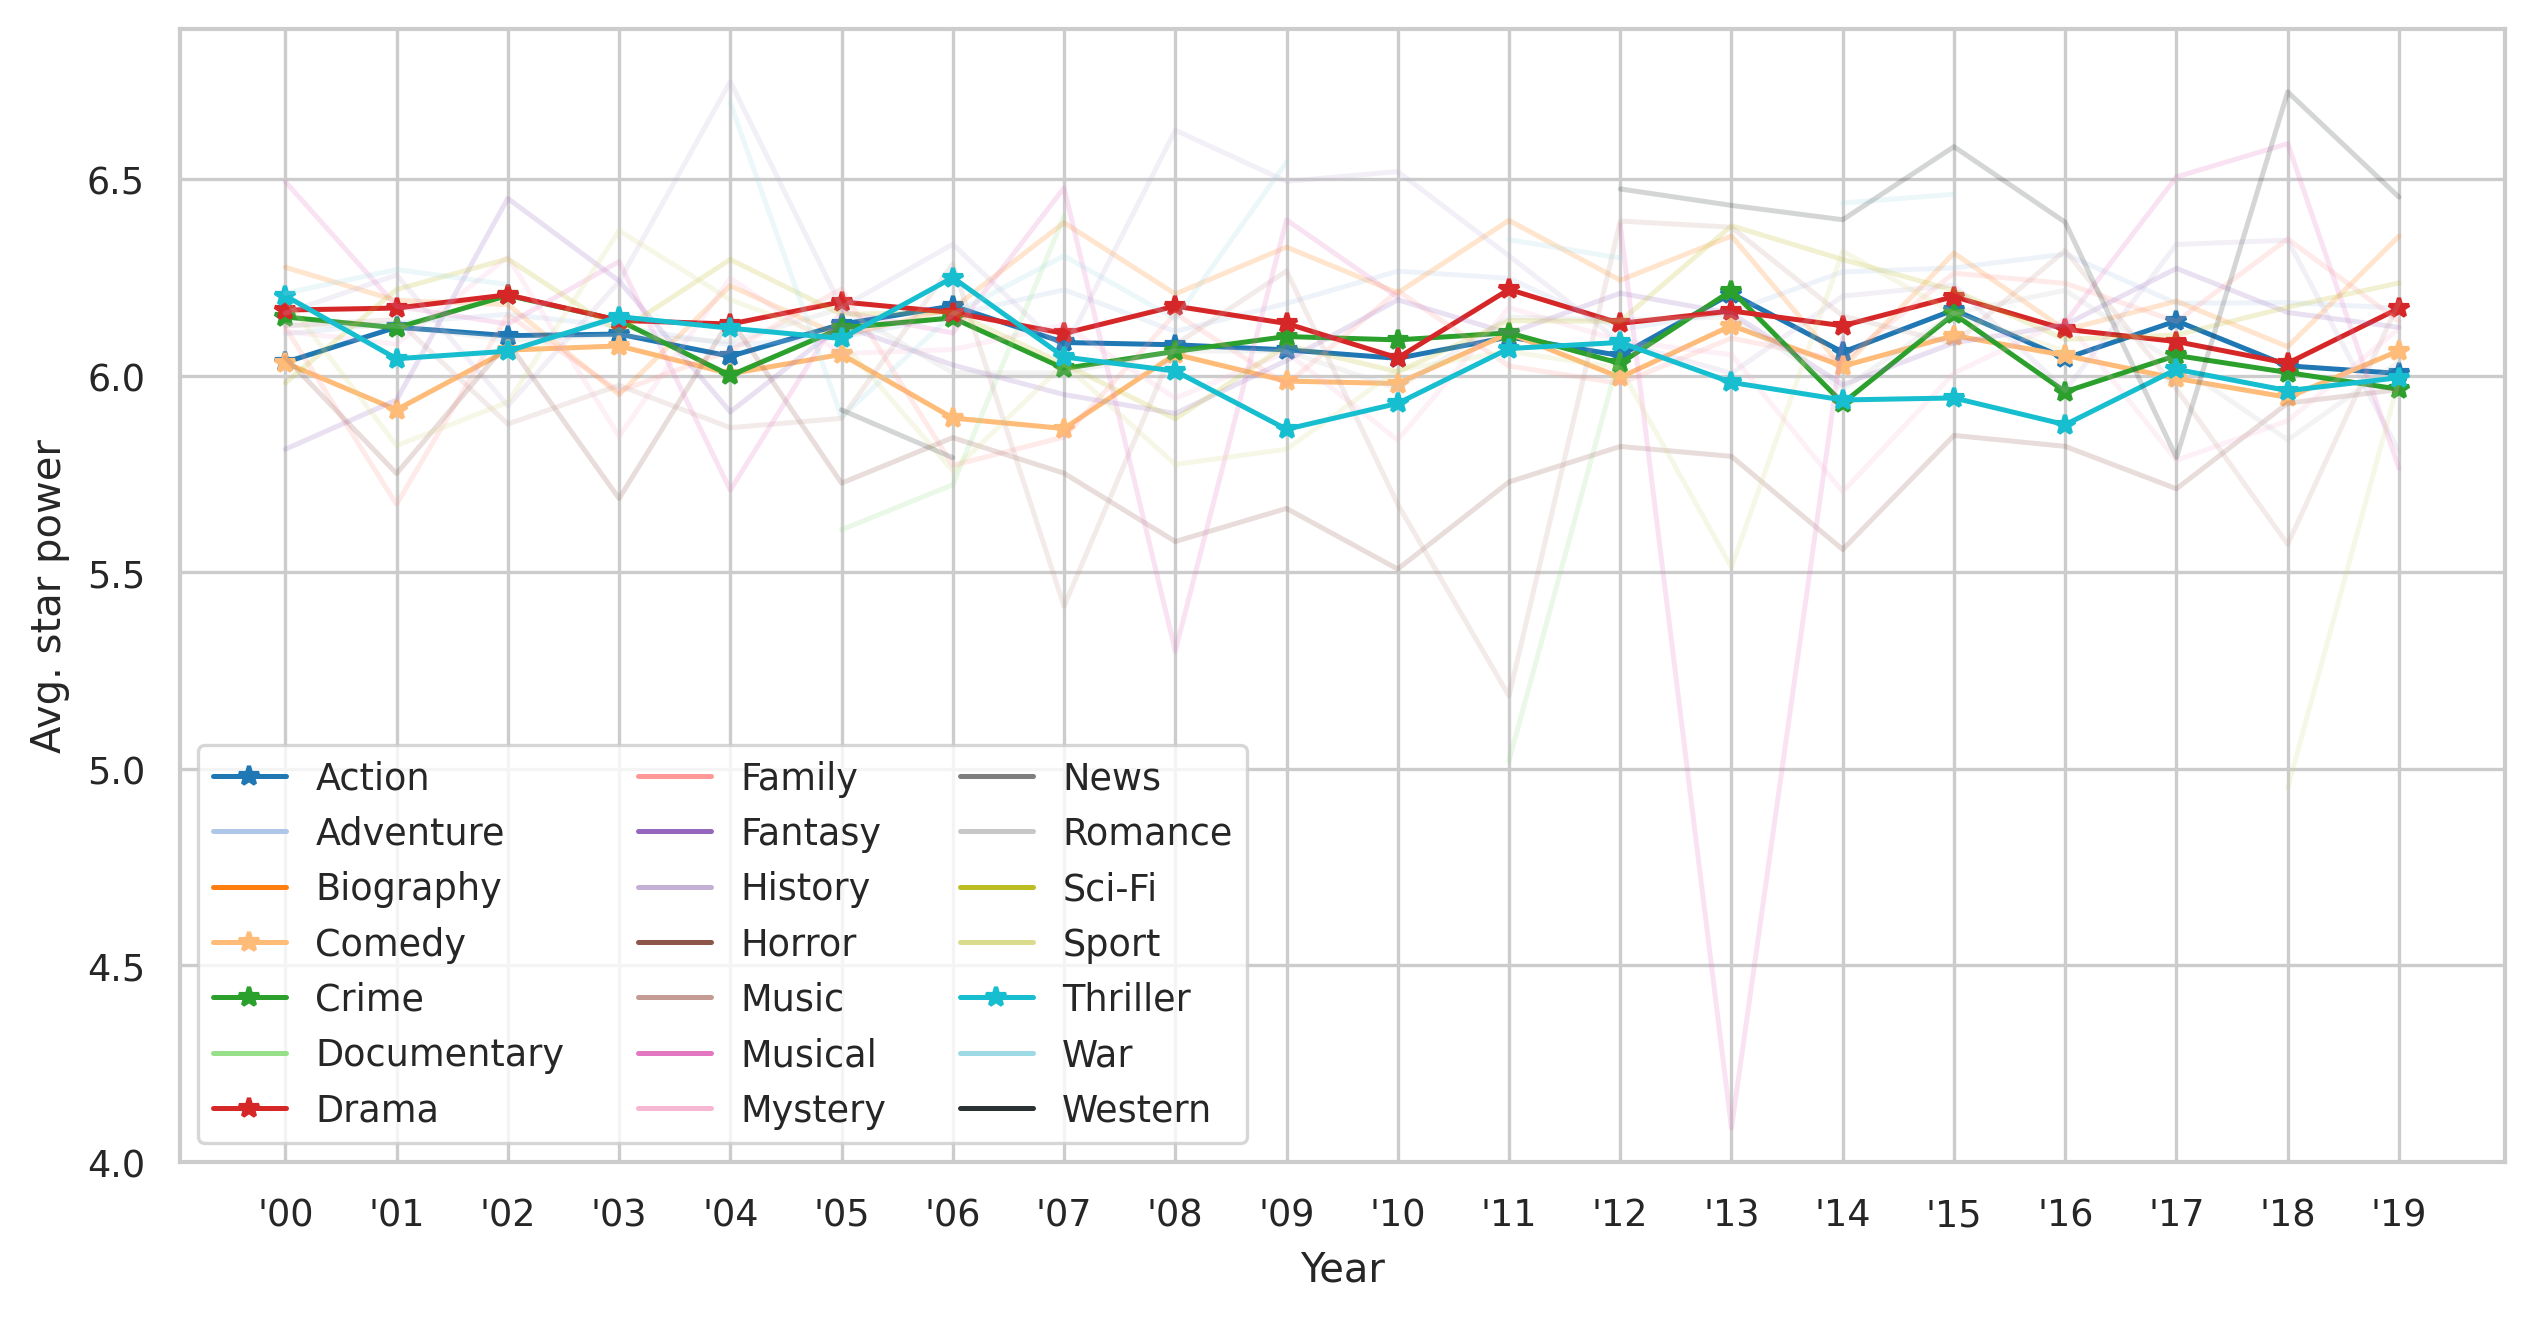

In [48]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5), dpi=300)

select_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Thriller']
years = np.arange(2000, 2020, 1)
year_labels = ["'" + str(y)[2:] for y in years]

for idx, genre in enumerate(genres):
  entry = star_genre_year_dict[genre]
  if genre in select_genres:
    plt.plot(list(entry.keys()), list(entry.values()), color=colors[idx], label=genre, marker='*', markersize=5)
  else:
    plt.plot(list(entry.keys()), list(entry.values()), color=colors[idx], label=genre, alpha=0.2)
  # plt.scatter(entry['actor'], entry['actress'], color=colors[idx], label=genre, s=150, alpha=0.7)
  # plt.scatter(entry['actor'], entry['actress'], color=colors[idx], label=genre, s=markers[genre], alpha=0.5)
  # plt.errorbar(entry['actor'], entry['actress'], xerr=stds['actor'], yerr=stds['actress'], linestyle='None', marker='^', color=colors[idx], alpha=0.3)

# limits = (min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1]))
# limits = (min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1]))
# plt.xlim(limits)
# plt.ylim(limits)

# plt.plot(limits, limits, color='black', alpha=0.5)

ax = plt.gca()
ax.set_ylim(bottom=4.0)

plt.xticks(years, year_labels)
plt.xlabel('Year')
plt.ylabel('Avg. star power')
plt.legend()

lgnd = plt.legend(loc="lower left", scatterpoints=1, ncol=3)
for handle in lgnd.legendHandles:
    # handle.set_sizes([36.0])
    handle.set_alpha(1)

plt.show()